# HW 5
Marco Boscato - 2096921

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial as fact

## Exercise 1
Let's develop the functions to compute Stumpff’s functions $c_n (z)$, n=1,2,...,5 and their first derivatives $c^{'}_n (z)$, n=1,2,3.

We can re-write the Stumpff's function in a numerical computation way using a recursion method.

From

$$
c_n(z) = \sum_{k=0}^{\infty} (-1)^k \frac{z^k}{(2k + n)!}
$$

we can define

$$
t_k (z) = (-1)^k \frac{z^k}{(2k + n)!}
$$

and by the ration of two adjacent terms we find

$$
\frac{t_k}{t_{k-1}} \quad \longrightarrow \quad t_k (z) = - \frac{z}{(2k + n -1)(2k + n)} \cdot t_{k-1} (z)
$$

such that

$$
c_n (z) = \sum_{k=0}^{\infty} t_k (z)
$$

In the other hand we can write the $c^{'}_n (z)$ as a linear combination of $c_n (z)$

$$
c^{'}_n (z) = \frac{n}{2}c_{n+2} (z) - \frac{1}{2}c_{n+1} (z)
$$

For low values of the order *n*, when the argument is sufficiently far from zero, we can use the Stumpff’s functions in term of (hyperbolic) trig functions since  they're closely related to the elementary circular function. We use a threshold of $10^{-2}$ to divide the trigonometric functions into the simple trigonometric functions.

In [2]:
# trigonometric functions
pos_func = [lambda x: np.cos(x), lambda x: np.sin(x)/x, lambda x: (1-np.cos(x))/x**2, lambda x: (x-np.sin(x))/x**3, lambda x: (np.cos(x)-1+x**2/2)/x**4, lambda x: (np.sin(x)-x+x**3/6)/x**5]
neg_func = [lambda x: np.cosh(x), lambda x: np.sinh(x)/x, lambda x: (np.cosh(x)-1)/x**2, lambda x: (np.sinh(x)-x)/x**3, lambda x: (np.cosh(x)-1-x**2/2)/x**4, lambda x: (np.sinh(x)-x-x**3/6)/x**5]

# recorsive Version

def tk(k, z, n):
    if k == 0:
        return 1/fact(n)
    else:
        return - (z)/((2*k + n - 1.)*(2*k + n)) * tk(k-1, z, n)
    
def uk(k, z, n):
    if k == 0:
        return 1/fact(n)
    else:
        return - (k + 1.)/((2*k + n + 1.)*(2*k + n + 2.)) * tk(k, z, n)
    

def Stumpffs_Cn(z, n, max_iter = 100, tol = 1e-4):
    c = 0.0
    k = 0.0
    diff = 1.
    if np.abs(z) > 1e-2:
        while (diff > tol) and (k < max_iter):
            temp = tk(k, z, n)
            diff = np.abs(temp - c)
            c = c + temp
            k += 1
        return c

    elif z>0:
        return pos_func[n]((z)**0.5)
    else:
        return neg_func[n]((-z)**0.5)


def Stumpffs_Cn_deriv_linear_comb(z, n):
    return 0.5*n*Stumpffs_Cn(z, n+2) - 0.5*Stumpffs_Cn(z, n+1)

Now let's calculate $c_n (z)$ and $c^{'}_n (z)$ for various *n=1,2,3,4,5*

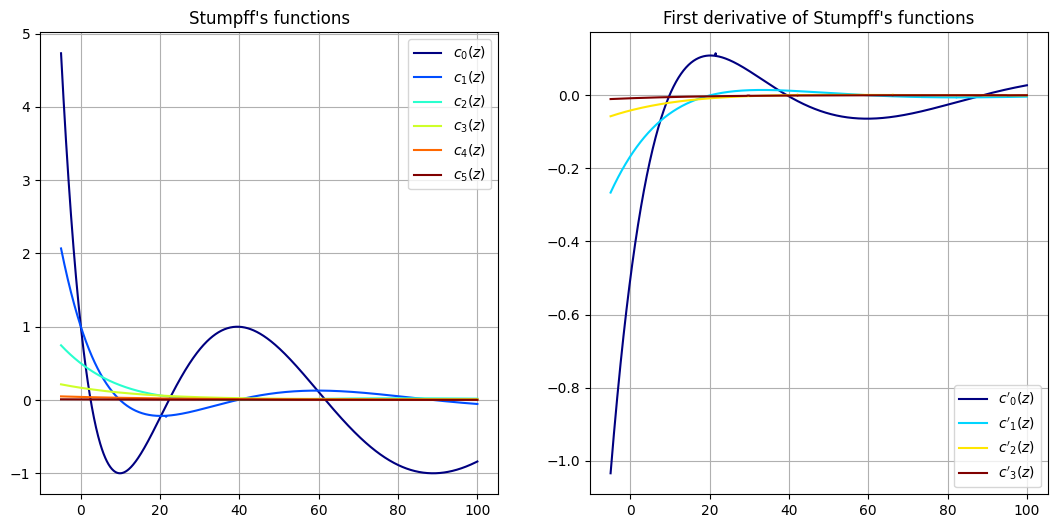

In [3]:
import matplotlib.cm as cmaps

x = np.linspace(-5, 100, 1000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6))

ax[0].set_title("Stumpff's functions")
for n, col in zip(range(0,6), cmaps.jet(np.linspace(0,1,6))):
  ax[0].plot(x, [Stumpffs_Cn(z, n=n) for z in x], color=col,  label =f'$c_{n}(z)$')
ax[0].legend()
ax[0].grid()

ax[1].set_title("First derivative of Stumpff's functions")
for n, col in zip(range(0,4), cmaps.jet(np.linspace(0,1,4))):
  ax[1].plot(x, [Stumpffs_Cn_deriv_linear_comb(z, n=n) for z in x], color=col,  label =f"$c'_{n}(z)$")
ax[1].legend()
ax[1].grid()

## Exercise 2
The solution of the universal Kepler equation, for example the determination of the parameter *s* in the terms of the time of flight $t-t_0$ and the other known parameters $\mu, r_0, \dot r_0$ and *C* of the orbit can be found by applying Newton-Raphson to find the root and after that the derivative of the time of flight with respect to the fictitios time is simply given by the radius vector $r(s)$:

$$
t - t_0 = r_0 s + r_0 \dot r_0 s^2 c_2 \left(-2Cs^2 \right) + \left( \mu + 2 r_0 C \right) s^3 c_3 \left(-2Cs^2 \right) \\
\quad \\
r(s) = r_0 c_0 \left(-2Cs^2 \right) + r_0 \dot r_0 s c_1 \left(-2Cs^2 \right) + \mu s^2 c_2 \left(-2Cs^2 \right)
$$

In [4]:
from scipy.optimize import newton
# Newton-Raphson Method

def Newton_Raphson(func, dfunc, x, tol = 1e-6, max_iter = 1000):
    i = 0.0
    while (abs(func(x)) > tol) and (i < max_iter):
        x = x - func(x)/dfunc(x)
        i += 1
    return x

# Kepler Equation
def Kepler_eq(t, t0, r0, dr0, mu, C):
    func = lambda s: r0*s + r0*dr0*s**2.*Stumpffs_Cn(z=(-2*C*s**2.), n=2) + (mu + 2*r0*C)*s**3. * Stumpffs_Cn(z=(-2*C*s**2.), n=3) - (t - t0)
    return func

def dev_Kepler_eq(r0, dr0, mu, C):
    func_prime = lambda s: r0 * Stumpffs_Cn(z=(-2*C*s**2.), n=0) + r0*dr0*s*Stumpffs_Cn(z=(-2*C*s**2.), n=1) + mu*s**2.*Stumpffs_Cn(z=(-2*C*s**2.), n=2)
    return func_prime

# resolve
def resolve_Kepler_eq(t, t0, r0, dr0, mu, C, s_guess):
    #solution1 = Newton_Raphson(func=Kepler_eq(t, t0, r0, dr0, mu, C), dfunc=dev_Kepler_eq(r0, dr0, mu, C), x=s_guess)
    solution2 = newton(func=Kepler_eq(t, t0, r0, dr0, mu, C), x0=s_guess, fprime=dev_Kepler_eq(r0, dr0, mu, C), rtol=1e-14)
    return solution2

## Exercise 3


In [5]:
# Initial conditions for Venus Flyby

R0 = np.array([-267733.084163, 199426.194677, 254709.414665]) # Initial position
R1 = np.array([177071.935393, -334448.764629, -184024.725921])  #Final position
V0 = np.array([4.168950, -2.598877, -3.925639])

GM = 324859.2139518842890 # Venus's GM

Let's propagate for 36 hours the following Venus-centric dynamical state. To do that we use the data of the Galileo Orbiter

We start by choosing an guess value os $s=0$

In [6]:
r0 = np.linalg.norm(R0)
dr0 = np.dot(R0, V0)/r0         #radial component of the velocity
C = 0.5*np.dot(V0, V0) - GM/r0  #Constant of energy
T = np.linspace(0, 36*3600, 100)

Venus_dynamical_states = np.zeros_like(T)
for i,time in enumerate(T):
    Venus_dynamical_states[i] = resolve_Kepler_eq(t=time, t0=0.0, r0=r0, dr0=dr0, mu=GM, C=C, s_guess=1.0)

C:\Users\bosca\AppData\Local\Temp\ipykernel_29820\1070099785.py:3: RuntimeWarning: invalid value encountered in scalar divide
  neg_func = [lambda x: np.cosh(x), lambda x: np.sinh(x)/x, lambda x: (np.cosh(x)-1)/x**2, lambda x: (np.sinh(x)-x)/x**3, lambda x: (np.cosh(x)-1-x**2/2)/x**4, lambda x: (np.sinh(x)-x-x**3/6)/x**5]


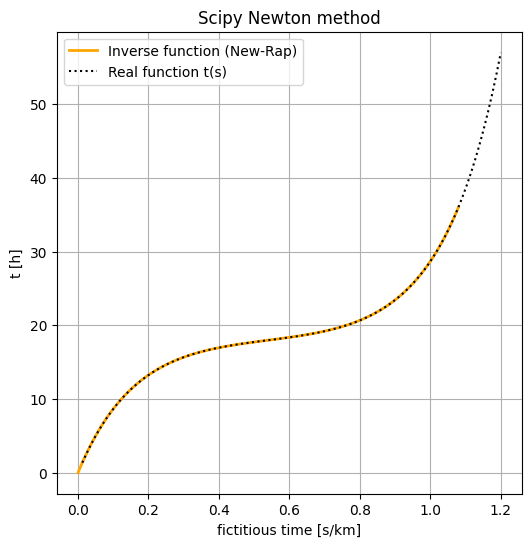

<Figure size 640x480 with 0 Axes>

In [7]:
def t_(s, t0, r0, dr0, C, mu):
  return r0*s + r0*dr0*s**2.*Stumpffs_Cn(z=(-2*C*s**2.), n=2) + (mu + 2*r0*C)*s**3. * Stumpffs_Cn(z=(-2*C*s**2.), n=3) + t0

# True function
S = np.linspace(0,1.2, 100)
t_list = np.array([t_(s, 0, r0, dr0, C, GM) for s in S])
udm = 3600 #Plot the times in hours

fig, ax= plt.subplots(figsize=(6, 6))
ax.set_title('Scipy Newton method')
ax.plot(Venus_dynamical_states, T/udm, color='orange', lw=2, label='Inverse function (New-Rap)')
ax.plot(S, t_list/udm, ls='dotted', color='k', label='Real function t(s)')

ax.set_xlabel('fictitious time [s/km]')
ax.set_ylabel('t [h]')
ax.legend()
ax.grid()

plt.show()
plt.tight_layout()

We can see from the plot that our root-finding algorithm follows pretty well the teoretical function

The position and velocity at a given parameter are given by the universal Lagrange coefficients matrix

$$
\begin{bmatrix}
r \\
\dot r \\
\end{bmatrix}

= 

\begin{bmatrix}
F & G \\
\dot F & \dot G \\
\end{bmatrix}

\cdot

\begin{bmatrix}
r_0 \\
\dot r_0 \\
\end{bmatrix}
$$

with

$$
F = 1 - \frac{\mu}{r_0} s^2 c_2 \left(-2C s^2\right) \\
G = t - t_0 - \mu s^3 c_3\left(-2C s^2\right) \\
\dot F = - \frac{\mu}{r(s) r_0} \left[s + 2C  s^3  c_3(-2C s^2) \right] \\
\dot G = 1 - \frac{\mu}{r(s)} s^2 c_2 \left(-2C s^2 \right)
$$

In [8]:
# Lagrange Coefficients
def ULM(s, t, t0, mu, r, r0, C):

  F =      1 - (mu/r0)*s**2.*Stumpffs_Cn(z=(-2*C*s**2.), n=2)
  G =      t - t0 - mu*s**3.*Stumpffs_Cn(z=(-2*C*s**2.), n=3)
  dF =     -(mu/(r*r0))*(s + 2*C*s**3. * Stumpffs_Cn(z=(-2*C*s**2.), n=3))
  dG =     1 - (mu/r)*s**2.*Stumpffs_Cn(z=(-2*C*s**2.), n=2)

  return np.array([F, G, dF, dG])


'''Radius as a function of s'''
def r_(s, r0, dr0, C, mu):
  return r0*Stumpffs_Cn(z=(-2*C*s**2.), n=0) + r0*dr0*s*Stumpffs_Cn(z=(-2*C*s**2.), n=1) + mu*s**2*Stumpffs_Cn(z=(-2*C*s**2.), n=2)


'''Get position and velocity during an orbit'''
def fly_by(time, mu, R0, V0):
  r0 = np.linalg.norm(R0)
  dr0 = np.dot(R0, V0)/r0         #radial component of the velocity
  C = 0.5*np.dot(V0, V0) - mu/r0  #Constant of energy

  s_new = resolve_Kepler_eq(t=time, t0=0.0, r0=r0, dr0=dr0, mu=GM, C=C, s_guess=1.0)  # fictitious time
  r_s = r_(s=s_new, r0=r0, dr0=dr0, C=C, mu=mu)

  ULM_new = ULM(s=s_new, t=time, t0=0.0, mu=mu, r=r_s, r0=r0, C=C)

  R = np.array([ULM_new[0]*R0 + ULM_new[1]*V0])
  V = np.array([ULM_new[2]*R0 + ULM_new[3]*V0])

  return R, V

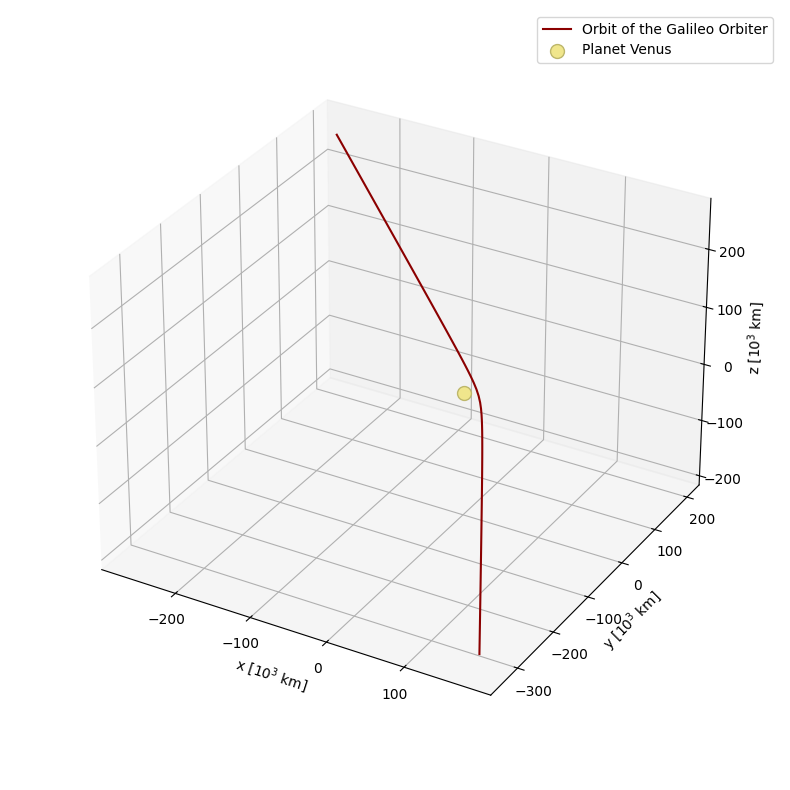

In [9]:
T = np.linspace(0, 36*3600, 101)

R_list = np.zeros((len(T), 3))  # Replace 3 with the length of the sequence returned by fly_by
V_list = np.zeros((len(T), 3))  # Replace 3 with the length of the sequence returned by fly_by

for i, t in enumerate(T):
  R_list[i], V_list[i] = fly_by(time=t, mu=GM, R0=R0, V0=V0)

udm = 1e3
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot(R_list[:,0]/udm, R_list[:,1]/udm, R_list[:,2]/udm, color='darkred', label='Orbit of the Galileo Orbiter')

ax.scatter(0,0,0, marker='o', color='khaki', edgecolors='darkkhaki', s=100, label='Planet Venus')
ax.legend()
ax.set_xlabel('x [$10^3$ km]')
ax.set_ylabel('y [$10^3$ km]')
ax.set_zlabel('z [$10^3$ km]')
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()
plt.show()

In [10]:
R_final, V_final = fly_by(time=36*3600, mu=GM, R0=R0, V0=V0)
print('The final dynamical state is :')
print('R: ', R_final[0], '[km]')
print('V: ', V_final[0], '[km/s]' )
dist = np.linalg.norm(R_list[0]-R1)
print(f'\n The distance from the true value R:{R_final} [km], is {dist} km')

The final dynamical state is :
R:  [ 176956.92970277 -334433.44069936 -184558.85545383] [km]
V:  [ 2.36979447 -5.24495423 -2.53289844] [km/s]

 The distance from the true value R:[[ 176956.92970277 -334433.44069936 -184558.85545383]] [km], is 821803.883972285 km


## Exercise 4
The Universal Lambert's equation gives the energy constant needed to orbit from to in a given time.

Similarly in Ex. 2 we use Newton-Raphson method to find the root of the equation that we can consider as the combination of the 3 equations. From the hand-calculated resolution, The derivate of the equation with respect to *z* is the following:

$$
\frac{A^2}{8 \mu s} + \frac{3sc_3 (z)}{2 c_2(z)} \left (\frac{A \sqrt{c_2(z)}}{4} - \mu s^2 c^{'}_2 (z) \right) + \mu s^3 c^{'}_3(z)
$$
and we try to use *z=1* as starting point so that our algorithm converge

In [11]:
def Lambert_eq(R0, R, Dt, mu):
    r0 = np.linalg.norm(R0)
    r = np.linalg.norm(R)
    Df = np.arccos(np.dot(R0, R)/(r0*r)) # true anomaly

    A = (np.sqrt(r0*r)*np.sin(Df))/(np.sqrt(1 - np.cos(Df)))
    s2 = lambda Z: (mu*Stumpffs_Cn(z=Z, n=2))**(-1) * (r0 + r - A*(Stumpffs_Cn(z=Z, n=1))/np.sqrt(Stumpffs_Cn(z=Z, n=2)))

    f = lambda Z: A*np.sqrt(s2(Z)*Stumpffs_Cn(z=Z, n=2)) + mu*(s2(Z))**1.5*Stumpffs_Cn(z=Z, n=3) - Dt

    f_prime = lambda Z: A**2/(8*mu*s2(Z)**0.5) + 3*s2(Z)*Stumpffs_Cn(z=Z, n=3)/(2*Stumpffs_Cn(z=Z, n=2))*(A/4*(Stumpffs_Cn(z=Z, n=2)**0.5) - mu*s2(Z)*Stumpffs_Cn_deriv_linear_comb(z=Z, n=2)) + mu*s2(Z)**1.5*Stumpffs_Cn_deriv_linear_comb(z=Z, n=3)

    z_new = newton(func=f, x0=1.0, fprime=f_prime, tol=1e-12)

    F = 1 - (GM/r0)*s2(z_new)*Stumpffs_Cn(z=z_new, n=2)
    G = 36*3600 - GM*s2(z_new)**1.5*Stumpffs_Cn(z=z_new, n=3)

    V0 = (R- F*R0)/G

    return V0



## Exercise 5
The initial velocity can be found by inverting with $r = F \rm r_0 + G \rm \dot r_0$ with *F, G* being the Lagrange coefficient in Ex.3

In [12]:
V = Lambert_eq(R0, R1, 36*3600, GM)
print(f'The initial velocity found by the Lambert equation is {V} [km/s]')
print(f'The real value is {V0} [km/s]')
print(f'The velocity difference is {V0-V} km/s (with magnitude {np.linalg.norm(V0-V)} km/s)')

The initial velocity found by the Lambert equation is [ 3.13466068 -4.3618355  -3.1379475 ] [km/s]
The real value is [ 4.16895  -2.598877 -3.925639] [km/s]
The velocity difference is [ 1.03428932  1.7629585  -0.7876915 ] km/s (with magnitude 2.190487377935409 km/s)


In [13]:
R_V, _ = fly_by(time=36*3600, mu=GM, R0=R0, V0=V)
print(f'The final position with this velocity is {R_V[0]} km,')
R_V0, _ = fly_by(time=36*3600, mu=GM, R0=R0, V0=V0)
print(f'while the one found in the propagation is {R_V0[0]} km')

The final position with this velocity is [ 177071.935393 -334448.764629 -184024.725921] km,
while the one found in the propagation is [ 176956.92970277 -334433.44069936 -184558.85545383] km
